# Algoritmos de busqueda

## Preparacion de datos

### Importar librerias

In [1]:
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para plotear
import pandas as pd #libreria de maneo de datos
import scipy as sp #libreria oython cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
import operator #operador

### Creacion de Dataframe, red y caracterisitcas

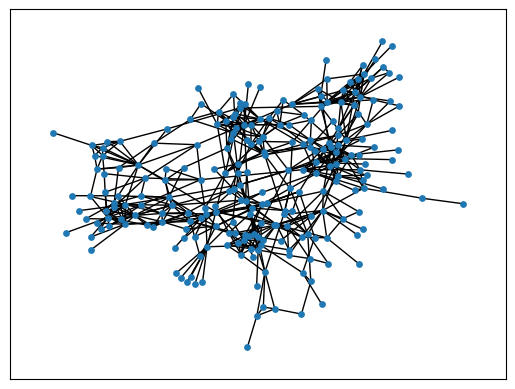

In [9]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red
plt.show()

In [12]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


In [10]:
#matriz de adyacencia
adyacencia=nx.adjacency_matrix(G).todense()
#dataframe de la matriz de adyacencia
DFadj=pd.DataFrame(adyacencia)
DFadj.to_csv('adjacencymatrix.csv')

Una vez creada la matriz de adyacencia, esta deja de tener los nombre de los nodos y se convierte en una matriz numerica, esto facilita el trabajo posterior por que no hay necesidad de preocuparse por los string, cada nodo es asignado por un numero.

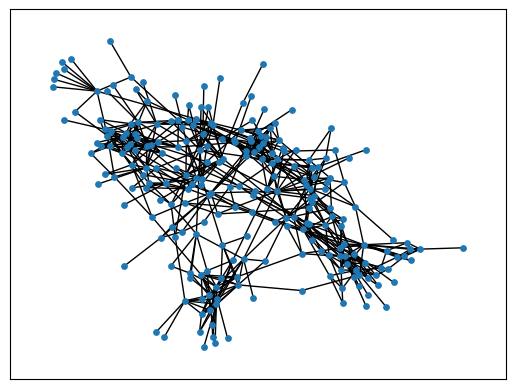

In [11]:
DFsec=pd.read_csv("adjacencymatrix.csv",header=None)
p1=DFsec.drop([0],axis=0) #elimina la columna de cabecera
p2=p1.drop([0],axis=1) #elimina la fila de cabecera
Pg=nx.from_pandas_adjacency(p2)
G1 = nx.from_pandas_adjacency(p2)
grafo=nx.draw_networkx(G1,with_labels=False,node_size=15)

In [13]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


### Tamaño de cluster

In [16]:
#tamaño de cluster
clustersize=nx.average_clustering(G)
clustersize

0.3296154175391464

### Distribucion de grado para la red de numeros

In [22]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
#listdegree1=list(degree)
#degree2=pd.DataFrame(listdegree1, dtype = np.float64)
degree1

,0,1
0,236,5
1,235,4
2,234,7
3,233,1
4,232,12
...,...,...
231,5,10
232,4,2
233,3,14
234,2,3


### Distribucion de grados para la red animal

In [23]:
degreeani=nx.degree(G)
degree1ani=pd.DataFrame(degreeani)
#listdegree1ani=list(degreeani)
#degree2ani=pd.DataFrame(listdegree1ani, dtype = np.float64)
degree1ani

,0,1
0,abeja,8
1,abejorro,3
2,aguila,14
3,aguilucho,2
4,arana,10
...,...,...
231,vaca,12
232,verderol,1
233,vibora,7
234,yegua,4


### Grado medio

In [25]:
#Grado medio
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

### Frecuencias de grado

In [26]:
pd.value_counts(degree1.iloc[:,1])

1     38
4     32
2     28
3     24
6     22
5     19
7     17
8     14
9     11
10    10
14     9
12     5
11     4
13     2
15     1
Name: 1, dtype: int64

## Algoritmo de busqueda por grado de nodo

In [27]:
#funcion de busqueda
def walked_nodes_by_degree_prob(network,nodo):
    nodes = list(network.nodes())
    current_node = nodo
    walked_nodes = [current_node]
    while len(walked_nodes) < len(nodes):
        neighbors = list(network.neighbors(current_node))
        neighbor_degrees = [network.degree(node) for node in neighbors]
        probabilities = [degree/sum(neighbor_degrees) for degree in neighbor_degrees]
        next_node = random.choices(neighbors, weights=probabilities)[0]
        walked_nodes.append(next_node)
        current_node = next_node
    return walked_nodes

In [29]:
count=1 #contador
i=1 #contador
matrix=[] #matriz de resultados
while i < nx.number_of_nodes(G1): #ciclo que crea la matriz
    while count < nx.number_of_nodes(G1): #ciclo que recorre la red
        pp=walked_nodes_by_degree_prob(G1,count)
        count+=1
        matrix.append(pp) #añade las listas a la matriz
        i+=1
newmatrix=np.delete(matrix,0,axis=1) #quita la primera columna
arreglouni=np.ravel(newmatrix)#convierte la mattriz a un arreglo unidimension
valores,frecuencia=np.unique(arreglouni,return_counts=True)#cal val,frec
tabla=[valores,frecuencia]#tabula
dataf=pd.DataFrame(tabla)#dataframe
print(dataf)

   0    1    2    3    4    5    6    7    8    9    ...  182  183  184  185  \
0    1    2    3    4    5    6    7    8    9   10  ...  224  227  228  229   
1   17    4   29    4   31    1   37   18    2   11  ...   15    4   47    1   

   186  187  188  189  190  191  
0  230  231  232  234  235  236  
1    2    1   24    6    2    4  

[2 rows x 192 columns]


In [30]:
print(newmatrix)

[[ 92 139 129 ... 118 125 118]
 [  8 141  92 ...  72 189  72]
 [ 58  42  58 ... 228   7 228]
 ...
 [214 180 228 ... 180 221 228]
 [ 92 128 125 ...  89 204  91]
 [228 221 180 ... 128  36  57]]
